## QUICK INSTALL of PyMT & permamodel:

### > conda install -c conda-forge pymt

## If you install pymt a couple days before, you may need to install ECSimpleSnow component seperatly:

### > conda install -conda-forge pymt_ecsimplesnow

## No Error Occured >> Let's get started

## Import Ku Component with PyMT

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load PyMT model(s)
import pymt.models
ku = pymt.models.Ku()

➡ models: FrostNumber, Ku, Hydrotrend, ECSimpleSnow, Cem, Waves


## Create Quickly an Example

##### lat & lon are used to extract soil infromation from built-in soil database

##### You can set up any value in the configuration file.

In [3]:
config_file, run_folder = ku.setup()

print(run_folder)

file = run_folder + '/' + config_file

%cat $file

/var/folders/c7/ql2rc7m13bg3f25k3lpj3pz80000gn/T/tmp5c2_ne2g
#===============================================================================
# PermaModel Config File for: Ku_method
#===============================================================================
# Input
comp_status      | Enabled              | string   | component status {Enabled; Disabled}
in_directory     | .                    | string   | input directory
out_directory    | .                    | string   | output directory
permafrost_dir   | .                    | string   | root permafrost code directory
site_prefix      | Test                 | string   | file prefix for the study site
case_prefix      | Case_test            | string   | file prefix for the model scenario
lat              | 64.8378              | float    | 64.8378N, 147.7164W
lon              | -147.7164            | float    | GIS coordinates
start_year       | 2009                 | long     | begining of the simulation time [year]
end_year  

## We will check what variables can we use in this model.

In [4]:
print('***All outputs:')
for outputs in ku.get_output_var_names():
    print(outputs)
    
print('*** All inputs:')
for inputs in ku.get_input_var_names():
    print(inputs)

***All outputs:
soil__temperature
soil__active_layer_thickness
*** All inputs:
latitude
longitude
datetime__start
datetime__end
atmosphere_bottom_air__temperature
atmosphere_bottom_air__temperature_amplitude
snowpack__depth
snowpack__density
water-liquid__volumetric-water-content-soil
vegetation__Hvgf
vegetation__Hvgt
vegetation__Dvf
vegetation__Dvt


## Keep all value in configuration file

In [5]:
ku.initialize(config_file, run_folder)

ku.update()

ALT = ku.get_value('soil__active_layer_thickness')
TPS = ku.get_value('soil__temperature')
TPS_K = ku.get_value('soil__temperature',units='K')

print(ALT, ku.get_var_units('soil__active_layer_thickness'))
print(TPS, ku.get_var_units('soil__temperature'))

print(TPS_K)

 
Ku model component: Initializing...
[ 0.51126976] m
[-6.7442986] deg_C
[ 266.4057014]


## We can try to creat quickly different case by using different values in setup process.

### Change Mean annual air temperature, annual amplitude, and also location, for example:

In [5]:
config_file, run_folder = ku.setup(T_air=-11, 
                                   A_air=16,
                                   lat  = 71.31,
                                   lon  = -156.66)

file = run_folder + '/' + config_file

%cat $file

#===============================================================================
# PermaModel Config File for: Ku_method
#===============================================================================
# Input
comp_status      | Enabled              | string   | component status {Enabled; Disabled}
in_directory     | .                    | string   | input directory
out_directory    | .                    | string   | output directory
permafrost_dir   | .                    | string   | root permafrost code directory
site_prefix      | Test                 | string   | file prefix for the study site
case_prefix      | Case_test            | string   | file prefix for the model scenario
lat              | 71.31                | float    | 64.8378N, 147.7164W
lon              | -156.66              | float    | GIS coordinates
start_year       | 2009                 | long     | begining of the simulation time [year]
end_year         | 2009                 | long     | begining of the si

## Run the model for new setup:

In [6]:
ku.initialize(config_file, run_folder)

ku.update()

ALT = ku.get_value('soil__active_layer_thickness')
TPS = ku.get_value('soil__temperature')

print(ALT)
print(TPS)

 
Ku model component: Initializing...
[ 0.40076362]
[-8.53998194]


## Exp 01 - SET SNOW DEPTH TO 1.0 m

In [7]:
ku.initialize(config_file, run_folder)
ku.set_value('snowpack__depth',1.0)

ku.update()

ALT = ku.get_value('soil__active_layer_thickness')
TPS = ku.get_value('soil__temperature')

print(ALT)
print(TPS)

 
Ku model component: Initializing...
[ 0.61054771]
[-3.34134298]


## Exp 02 - Make the soil dry
### SET VWC to 0.1 m3/m3

In [8]:
ku.initialize(config_file, run_folder)

ku.set_value('water-liquid__volumetric-water-content-soil',0.1)

ku.update()

ALT = ku.get_value('soil__active_layer_thickness')
TPS = ku.get_value('soil__temperature')

print(ALT)
print(TPS)

 
Ku model component: Initializing...
[ 0.87461586]
[-8.06388155]


## Exp 03 - Make the soil wet
### SET VWC to 0.9 m3/m3

In [9]:
ku.initialize(config_file, run_folder)

ku.set_value('water-liquid__volumetric-water-content-soil',0.9)

ku.update()

ALT = ku.get_value('soil__active_layer_thickness')
TPS = ku.get_value('soil__temperature')

print(ALT)
print(TPS)

 
Ku model component: Initializing...
[ 0.17643846]
[-9.0200761]


## Exp 04 - Make climate warmer
### SET MEAN ANNUAL AIR TEMPERATURE to -5 degree C, keep annual amplitude as 16 C

In [10]:
ku.initialize(config_file, run_folder)

ku.set_value('atmosphere_bottom_air__temperature',-5.0)

ku.update()

ALT = ku.get_value('soil__active_layer_thickness')
TPS = ku.get_value('soil__temperature')

print(ALT)
print(TPS)

 
Ku model component: Initializing...
[ 0.83383955]
[-3.30302571]


## Exp 05 - Change location, i.e., use different soils

In [9]:
config_file, run_folder = ku.setup(lat  = 31.00,
                                   lon  = 136.66)

ku.initialize(config_file, run_folder)

ku.update()

ALT = ku.get_value('soil__active_layer_thickness')
TPS = ku.get_value('soil__temperature')

print(ALT)
print(TPS)

 
Ku model component: Initializing...
[ 0.51101042]
[-6.73914338]


## Exp 06 - Simulate for a time-series

In [12]:
import pandas
data = pandas.read_csv("https://raw.githubusercontent.com/mcflugen/pymt_ku/master/data/Barrow_1961-2015.csv")

maat = data["atmosphere_bottom_air__temperature"]
tamp = data["atmosphere_bottom_air__temperature_amplitude"]
snow_depth = data["snowpack__depth"]

data

,atmosphere_bottom_air__temperature,snowpack__depth,atmosphere_bottom_air__temperature_amplitude
0,-13.1980,0.29612,18.070
1,-10.7460,0.40822,15.538
2,-12.0420,0.27510,15.694
3,-15.2060,0.21657,18.519
4,-12.7290,0.24719,17.937
5,-13.1050,0.31827,16.743
6,-11.9630,0.21748,14.936
7,-12.2300,0.30102,18.760
8,-12.8220,0.19425,14.966
9,-13.8100,0.13143,15.582


In [13]:
config_file, run_folder = ku.setup(lat  = 71.31,
                                   lon  = -156.66,
                                   start_year = 1961,
                                   end_year = 2015)

file = run_folder + '/' + config_file

%cat $file

#===============================================================================
# PermaModel Config File for: Ku_method
#===============================================================================
# Input
comp_status      | Enabled              | string   | component status {Enabled; Disabled}
in_directory     | .                    | string   | input directory
out_directory    | .                    | string   | output directory
permafrost_dir   | .                    | string   | root permafrost code directory
site_prefix      | Test                 | string   | file prefix for the study site
case_prefix      | Case_test            | string   | file prefix for the model scenario
lat              | 71.31                | float    | 64.8378N, 147.7164W
lon              | -156.66              | float    | GIS coordinates
start_year       | 1961                 | long     | begining of the simulation time [year]
end_year         | 2015                 | long     | begining of the si

In [14]:
ku.initialize(config_file, run_folder)

 
Ku model component: Initializing...


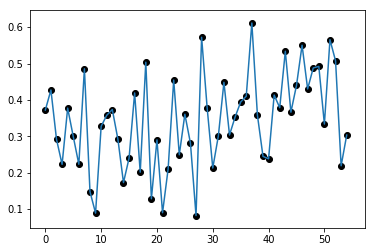

In [15]:
h = plt.figure()
thickness_ts = np.zeros(55)
for i in range(55):
    ku.set_value("atmosphere_bottom_air__temperature", maat.values[i])
    ku.set_value("atmosphere_bottom_air__temperature_amplitude", tamp.values[i])
    ku.set_value("snowpack__depth", snow_depth.values[i])
    t0 = ku.time
    ku.update()
    thickness = ku.get_value('soil__active_layer_thickness')
    thickness_ts[i] = thickness
    plt.scatter(t0, thickness,c='k')
    
plt.plot(thickness_ts)

In [16]:
ku.var

{'water-liquid__volumetric-water-content-soil': <DataValues>
 float64 water-liquid__volumetric-water-content-soil(node)
 Attributes:
     units: m3 m-3
     grid: 8
     intent: in
     location: node, 'latitude': <DataValues>
 float64 latitude(node)
 Attributes:
     units: degree_north
     grid: 0
     intent: in
     location: node, 'vegetation__Dvt': <DataValues>
 float64 vegetation__Dvt(node)
 Attributes:
     units: m2 s-1
     grid: 12
     intent: in
     location: node, 'vegetation__Hvgt': <DataValues>
 float64 vegetation__Hvgt(node)
 Attributes:
     units: m
     grid: 10
     intent: in
     location: node, 'datetime__start': <DataValues>
 int32 datetime__start(node)
 Attributes:
     units: year
     grid: 2
     intent: in
     location: node, 'snowpack__density': <DataValues>
 float64 snowpack__density(node)
 Attributes:
     units: kg m-3
     grid: 7
     intent: in
     location: node, 'longitude': <DataValues>
 float64 longitude(node)
 Attributes:
     units: degree

In [17]:
ku.parameters

dict_items([('site_prefix', 'Test'), ('case_prefix', 'Case_test'), ('lat', 71.31), ('lon', -156.66), ('start_year', 1961), ('end_year', 2015), ('dt', 1.0), ('T_air', -11), ('T_air_file', 'off'), ('A_air', 16), ('A_air_file', 'off'), ('h_snow', 0.3), ('h_snow_file', 'off'), ('rho_snow', 240.0), ('rho_snow_file', 'off'), ('vwc_H2O', 0.4), ('vwc_H2O_file', 'off'), ('Hvgf', 0.0), ('Hvgf_file', 'off'), ('Hvgt', 0.0), ('Hvgt_file', 'off'), ('Dvf', 1.39e-06), ('Dvf_file', 'off'), ('Dvt', 5.56e-08), ('Dvt_file', 'off'), ('ALT_file', 'off'), ('TPS_file', 'off')])